In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,datasets
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR

In [2]:
# Download dataset
orig_train_set = datasets.MNIST('data/',train=True,download=True)
orig_test_set = datasets.MNIST('data/',train=False,download=True)

In [3]:
# Tensor data into arrays

orig_train_data = orig_train_set.data.numpy()
orig_test_data = orig_test_set.data.numpy()
orig_train_labels = orig_train_set.targets.numpy()
orig_test_labels = orig_test_set.targets.numpy()

In [4]:
# Data creation for Segmentation 

orig_image_size = 28
num_train_data = 5000
num_valid_data = 250
num_test_data = 1000
seg_image_size = 128
num_search_spot_iter = 250


def seg_data_creation(num_seg_data=5250,seg_image_size=128,num_digits=9,from_train=True):
    seg_images = np.zeros([num_seg_data,seg_image_size,seg_image_size],np.float32)
    seg_labels = np.empty([num_seg_data,seg_image_size,seg_image_size],np.float32)
    seg_labels.fill(10)#10 for background class
    if from_train:
        source_data = orig_train_data
        source_labels = orig_train_labels
    else:
        source_data = orig_test_data
        source_labels = orig_test_labels
    print('Generating {number} images...'.format(number=num_seg_data))
    for seg_image,seg_label in zip(seg_images,seg_labels):
        for n in range(num_digits):
            data_index = np.random.randint(0,len(source_data))
            orig_image = source_data[data_index].reshape(orig_image_size,orig_image_size)
            orig_label = source_labels[data_index]
            orig_seg_label = np.empty([orig_image_size,orig_image_size],np.float32)
            orig_seg_label.fill(10)
            orig_seg_label[np.where(orig_image>0)] = orig_label
            for i in range(num_search_spot_iter):
                x_pos = np.random.randint(0,seg_image_size-orig_image_size)
                y_pos = np.random.randint(0,seg_image_size-orig_image_size)
                if seg_image[x_pos:x_pos+orig_image_size,y_pos:y_pos+orig_image_size].sum()==0:
                    seg_image[x_pos:x_pos+orig_image_size,y_pos:y_pos+orig_image_size] = orig_image
                    seg_label[x_pos:x_pos+orig_image_size,y_pos:y_pos+orig_image_size] = orig_seg_label
                    break
    print('Done!')
    return seg_images,seg_labels


train_seg_images,train_seg_labels = seg_data_creation(5000,128,9,True)
valid_seg_images,valid_seg_labels = seg_data_creation(250,128,9,True) 
test_seg_images,test_seg_labels = seg_data_creation(1000,128,9,False) 

Generating 5000 images...
Done!
Generating 250 images...
Done!
Generating 1000 images...
Done!


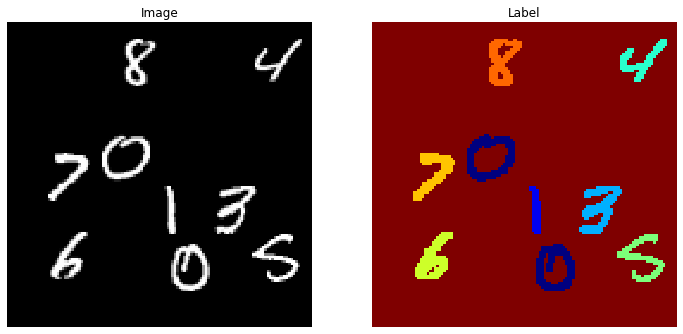

In [7]:
# Visualize segmentation data

viz_idx = 1500
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))
ax1.imshow(train_seg_images[viz_idx],cmap='gray')
ax1.set_title('Image')
ax1.axis('off')
ax2.imshow(train_seg_labels[viz_idx],cmap='jet')
ax2.set_title('Label')
ax2.axis('off')
plt.show()